In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [4]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [5]:
# Create a tensor
tensor_5d = Tensor(np.full([1, 1, 1, 1, 1], 5))

# Result preview
print(tensor_5d)
tensor_5d.data

This tensor is of order 5 and consists of 1 elements.
Sizes and names of its modes are (1, 1, 1, 1, 1) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


array([[[[[5]]]]])

In [6]:
# Calculate Frobenious norm
np.linalg.norm(tensor_5d.data)

5.0

### Solution: Part 2

In [7]:
# Initialise
tensor_list =[]
tensor_size =[]
# Desired dimension size
size = [2]
# Order range
order = range(3, 21)
# Create tensors and collect information
for index_order in order:
    tensor_list.append(np.ones(size * index_order))
    tensor_size.append(np.ones(size * index_order).size)
# Instance of order 5
tensor_list[2]

array([[[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]],



       [[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]]])

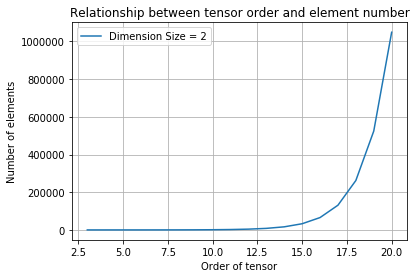

In [8]:
# Plot results
plt.plot(order, tensor_size)
plt.grid(True)
plt.legend(['Dimension Size = 2'])
plt.title('Relationship between tensor order and element number')
plt.xlabel('Order of tensor')
plt.ylabel('Number of elements')
plt.show()

### Solution: Part 3

In [9]:
# Initialise
tensor_list =[]
tensor_size =[]
# Desired tensor order
order = 3
# Range of dimension size
size = range(3, 16)
# Create tensors and collect information
for index_size in size:
    tensor_list.append(np.ones(order * [index_size]))
    tensor_size.append(np.ones(order * [index_size]).size)
# Instance of dimension size 5
tensor_list[2]

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

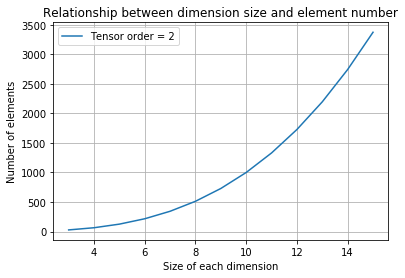

In [10]:
# Plot results
plt.plot(size, tensor_size)
plt.grid(True)
plt.legend(['Tensor order = 2'])
plt.title('Relationship between dimension size and element number')
plt.xlabel('Size of each dimension')
plt.ylabel('Number of elements')
plt.show()

### Solution: Part 4

As a generalisation of scalar, vector and matrice, tensor can describe objects in a higher-dimensional space. The order depends on the number of dimensions. In _numpy_, it equals the number of the brackets displayed before the first element. Although a higher order brings more possibilities _(e.g. more complicated networks)_, the number of elements and the computational complexity grows exponentially, and it may lead to overfitting as well. Emperically, a order larger than 7 is unnecessary. In comparison, the size of each dimension indicates the length of sample. With a proper order as 2, increasing the number of samples can improve the resolution without the requirement of a large memory.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [11]:
# Mode-2 fiber
tensor.data[0,1,:]

array([4, 5, 6, 7])

In [48]:
# Frontal slice (fixed)
tensor.data[:,:,0]

array([[ 0,  4,  8],
       [12, 16, 20]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [13]:
# Create a tensor of order 4
tensor_4d = Tensor(np.arange(81).reshape([3, 3, 3, 3]))
print(tensor_4d)
tensor_4d.data

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]],


       [[[27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],

        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53]]],


       [[[54, 55, 56],
         [57, 58, 59],
         [60, 61, 62]],

        [[63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80]]]])

In [47]:
# Display slices
for index_m0 in range(0, tensor_4d.shape[0]):
    print('Horizontal slice %d: ' % (index_m0))
    print(tensor_4d.data[index_m0, :, :, :])
    print('--------------------')

Horizontal slice 0: 
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
--------------------
Horizontal slice 1: 
[[[27 28 29]
  [30 31 32]
  [33 34 35]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]]]
--------------------
Horizontal slice 2: 
[[[54 55 56]
  [57 58 59]
  [60 61 62]]

 [[63 64 65]
  [66 67 68]
  [69 70 71]]

 [[72 73 74]
  [75 76 77]
  [78 79 80]]]
--------------------


In [45]:
def display_row_fibers():
    # Initialise
    counter = 0
    target = 5
    # Display fibers
    for index_m0 in range(0, tensor_4d.shape[0]):
        for index_m2 in range(0, tensor_4d.shape[2]):
            for index_m3 in range(0, tensor_4d.shape[3]):
                counter+=1
                print('Row fiber %d: ' % (counter))
                print(tensor_4d.data[index_m0, :, index_m2, index_m3])
                print('--------------------')
                if counter == target:
                    return
display_row_fibers()

--------------------
Row fiber 1: 
[ 0  9 18]
--------------------
Row fiber 2: 
[ 1 10 19]
--------------------
Row fiber 3: 
[ 2 11 20]
--------------------
Row fiber 4: 
[ 3 12 21]
--------------------
Row fiber 5: 
[ 4 13 22]


### Solution: Part 2

In [65]:
# Create a tensor of order 3
tensor_3d = Tensor(np.ones([4, 2, 5]))
for index_m2 in range(0, tensor_3d.shape[2]):
    tensor_3d.data[:, :, index_m2] = np.dot(tensor_3d.data[:, :, index_m2], 2 ** index_m2)
print(tensor_3d)
tensor_3d.data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]],

       [[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]],

       [[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]],

       [[ 1.,  2.,  4.,  8., 16.],
        [ 1.,  2.,  4.,  8., 16.]]])

# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [66]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [77]:
# Create a tensor
tensor_4d = Tensor(np.arange(360).reshape(6, 5, 4, 3))

In [78]:
# Display unfolded version (the second mode refers to mode-1)
tensor_4d.unfold(mode=1).data

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 300, 301, 302, 303, 304,
        305, 306, 307, 308, 309, 310, 311],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 192, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 202, 203, 252, 253, 254, 255,
        256, 257, 258, 259, 260, 261, 262, 263, 312, 313, 314, 315, 316,
        317, 318, 319, 320, 321, 322, 323],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95, 144, 145,
        146, 147, 148, 149, 150, 151

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [19]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [20]:
# Create original tensor 


In [21]:
# Create matrix


In [22]:
# Perform mode-n product 


In [23]:
# Validate equivalence between the left and right hand side


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
# Create tensor


In [25]:
# Create matrices


In [26]:
# Validate property 1


In [27]:
# Validate property 2


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [28]:
%%latex



<IPython.core.display.Latex object>